<img src="rupixen-Q59HmzK38eQ-unsplash.jpg" alt="Someone is trying to purchase a produce online" width="500"/>

Online shopping decisions rely on how consumers engage with online store content. You work for a new startup company that has just launched a new online shopping website. The marketing team asks you, a new data scientist, to review a dataset of online shoppers' purchasing intentions gathered over the last year. Specifically, the team wants you to generate some insights into customer browsing behaviors in November and December, the busiest months for shoppers. You have decided to identify two groups of customers: those with a low purchase rate and returning customers. After identifying these groups, you want to determine the probability that any of these customers will make a purchase in a new marketing campaign to help gauge potential success for next year's sales.

### Data description:

You are given an `online_shopping_session_data.csv` that contains several columns about each shopping session. Each shopping session corresponded to a single user. 

|Column|Description|
|--------|-----------|
|`SessionID`|unique session ID|
|`Administrative`|number of pages visited related to the customer account|
|`Administrative_Duration`|total amount of time spent (in seconds) on administrative pages|
|`Informational`|number of pages visited related to the website and the company|
|`Informational_Duration`|total amount of time spent (in seconds) on informational pages|
|`ProductRelated`|number of pages visited related to available products|
|`ProductRelated_Duration`|total amount of time spent (in seconds) on product-related pages|
|`BounceRates`|average bounce rate of pages visited by the customer|
|`ExitRates`|average exit rate of pages visited by the customer|
|`PageValues`|average page value of pages visited by the customer|
|`SpecialDay`|closeness of the site visiting time to a specific special day|
|`Weekend`|indicator whether the session is on a weekend|
|`Month`|month of the session date|
|`CustomerType`|customer type|
|`Purchase`|class label whether the customer make a purchase|

In [148]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load and view your data
shopping_data = pd.read_csv("online_shopping_session_data.csv")
shopping_data.head()

,SessionID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Month,CustomerType,Purchase
0,1,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
1,2,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,Feb,Returning_Customer,0.0
2,3,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,Feb,Returning_Customer,0.0
3,4,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,Feb,Returning_Customer,0.0
4,5,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,Feb,Returning_Customer,0.0


In [149]:
nov_dec_data = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]

In [150]:
# Start your code here!
# Use as many cells as you like

# Get Nov+Dec data
nov_dec_data = shopping_data[shopping_data['Month'].isin(['Nov', 'Dec'])]

# Make sure 'Purchase' is boolean (if not already)
nov_dec_data['Purchase'] = nov_dec_data['Purchase'].astype(bool)

# Calculate overall purchase rates 
purchase_rate_total = nov_dec_data['Purchase'].mean().round(3)
print("Total online purchase rates")
print(purchase_rate_total)
# Calculate purchase rate per customer type

purchase_rates_series = nov_dec_data.groupby('CustomerType')['Purchase'].mean().round(3)
# Convert to dictionary with exact key names
purchase_rates = {
    "Returning_Customer": purchase_rates_series.get('Returning_Customer', 0),
    "New_Customer": purchase_rates_series.get('New_Customer', 0)
}

print(purchase_rates)

Total online purchase rates
0.208
{'Returning_Customer': 0.196, 'New_Customer': 0.273}


Overall Purchase Rate: 0.208

    This means that 20.8% of all sessions in your dataset resulted in a purchase.
    In other words, about 1 in 5 visitors ended up buying something.
➤ By Customer Type:

    New_Customer: 27.3%
    Returning_Customer: 19.9%

💡 Insights:

    New customers are more likely to make a purchase than returning customers.

This might suggest:

    Promotions or landing pages are more effective on new users.
    Returning customers might be browsing or comparing before buying.

Depending on your business goals (e.g., increasing conversion or boosting loyalty), this could indicate a need to improve the experience or offers targeted at returning visitors.

In [151]:
returning_nov_dec = nov_dec_data[nov_dec_data['CustomerType'] == 'Returning_Customer']

duration_cols = [
    'Administrative_Duration',
    'Informational_Duration',
    'ProductRelated_Duration'
]

# Calculate correlation matrix
corr_matrix = returning_nov_dec[duration_cols].corr()

# Unstack to get pairs, exclude self-correlations
corr_unstacked = corr_matrix.where(~np.eye(len(duration_cols), dtype=bool)).unstack().dropna()

# Find strongest correlation (absolute value)
strongest_corr = corr_unstacked.abs().idxmax()
strongest_value = corr_unstacked[strongest_corr]

top_correlation = {
    "pair": strongest_corr,
    "correlation": round(strongest_value, 3)
}

print(top_correlation)

{'pair': ('Administrative_Duration', 'ProductRelated_Duration'), 'correlation': 0.417}


**Strongest Correlation among Duration Variables:**

    Between: Administrative_Duration and ProductRelated_Duration
    Correlation coefficient: 0.417

💡 What it means:

    A correlation of +0.417 is a moderate positive correlation.
    So, users who spend more time on administrative pages also tend to spend more time on product pages.

➤ Possible interpretation:

    These users are more engaged overall. Maybe:
        They are closer to converting (e.g., checking order status, shipping info, then products).
        Or they are serious buyers doing thorough research and account actions.

In [152]:
duration_cols = [
    'Administrative_Duration',
    'Informational_Duration',
    'ProductRelated_Duration'
]

# Compute correlation between each duration and Purchase
correlations = shopping_data[duration_cols + ['Purchase']].corr()['Purchase'].drop('Purchase')

print("Correlation between durations and purchase:")
print(correlations)

Correlation between durations and purchase:
Administrative_Duration    0.093285
Informational_Duration     0.069075
ProductRelated_Duration    0.150090
Name: Purchase, dtype: float64


In [153]:
from scipy.stats import binom

# Base purchase rate for returning customers
base_rate = purchase_rates["Returning_Customer"]
print(f"Base rate for returning customers right now is: {base_rate}")

# Improved rate (15% increase)
improved_rate = base_rate * 1.15
print(f"Improved rate for returning customers will be: {improved_rate}")
n = 500
k = 99  # for CDF calculation (less than 100)

# Calculate probability P(X >= 100)
prob_at_least_100_sales = 1 - binom.cdf(k, n, improved_rate)

print(f"Probability of at least 100 sales: {prob_at_least_100_sales:.4f}")

Base rate for returning customers right now is: 0.196
Improved rate for returning customers will be: 0.2254
Probability of at least 100 sales: 0.9227


There is a **92.27%** chance that you will get 100 or more purchases out of 500 returning customer sessions if the purchase rate improves by 15%.

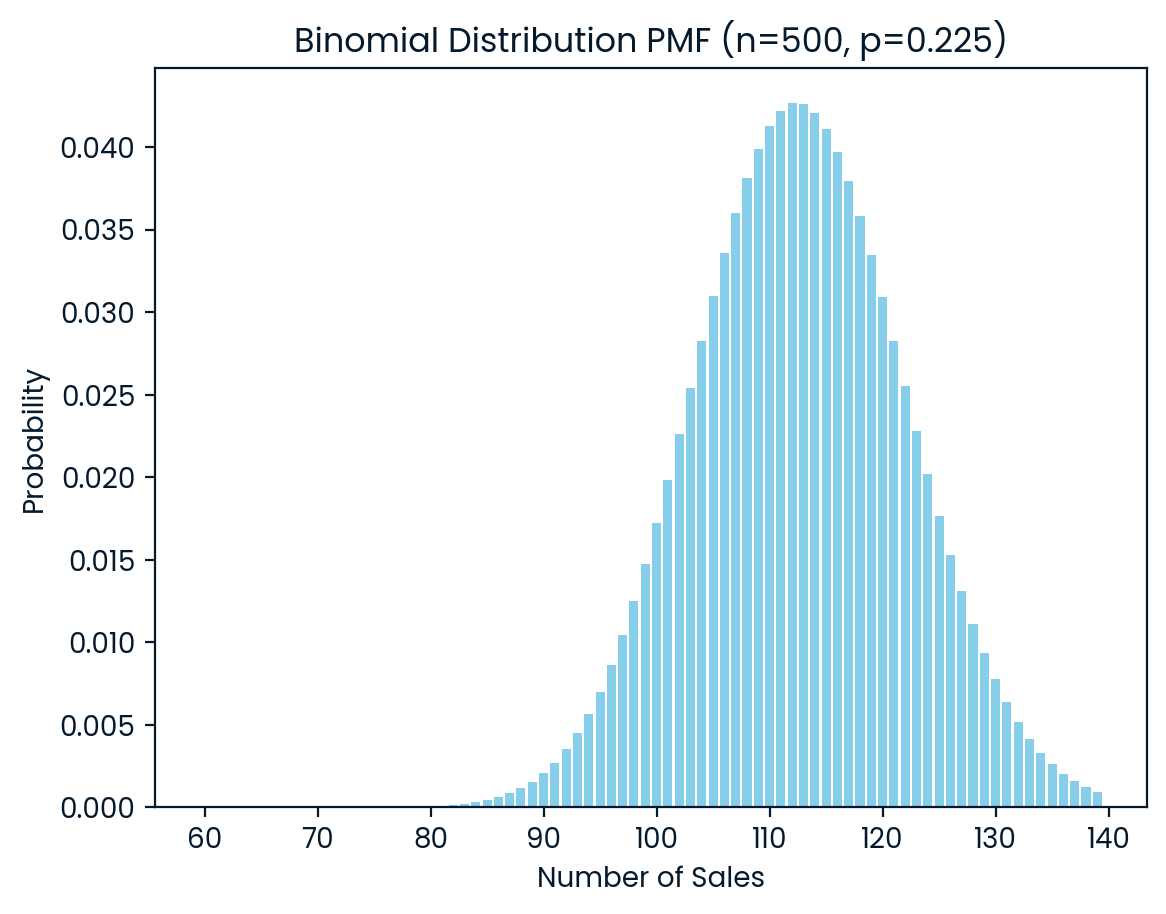

In [154]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(60, 140)
pmf = binom.pmf(x, n, improved_rate)

plt.bar(x, pmf, color='skyblue')
plt.title(f'Binomial Distribution PMF (n={n}, p={improved_rate:.3f})')
plt.xlabel('Number of Sales')
plt.ylabel('Probability')
plt.show()

In [155]:
from scipy.stats import binom

n = 500
k = 99  # for CDF calculation (one less than 100)
old_rate = 0.196

# Calculate probability P(X >= 100) for old rate
prob_old = 1 - binom.cdf(k, n, old_rate)

print(f"Probability of at least 100 purchases with old rate (0.196): {prob_old:.4f}")

Probability of at least 100 purchases with old rate (0.196): 0.4286


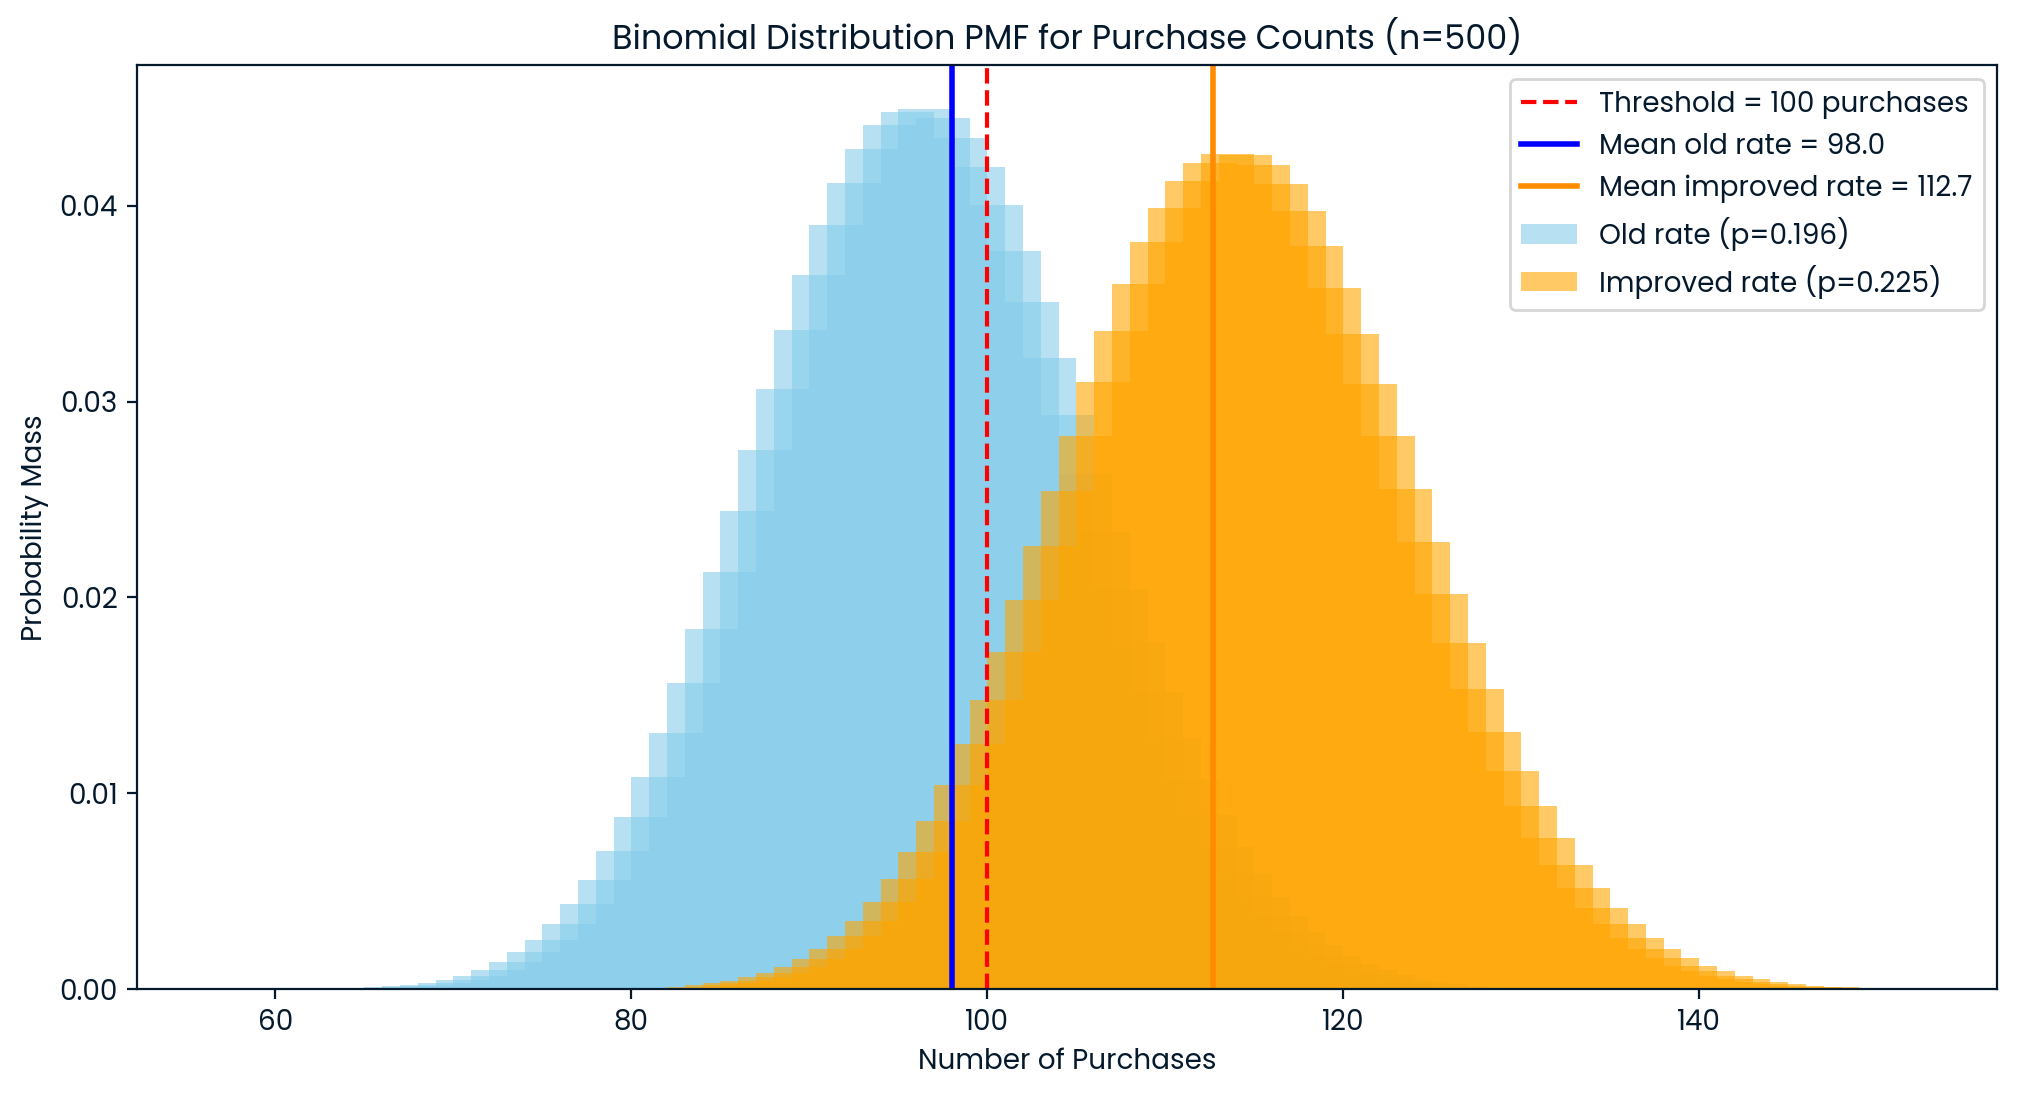

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 500
old_rate = purchase_rates["Returning_Customer"]
improved_rate = old_rate * 1.15
threshold = 100

x = np.arange(60, 150)

pmf_old = binom.pmf(x, n, old_rate)
pmf_improved = binom.pmf(x, n, improved_rate)

plt.figure(figsize=(12, 6))

# Plot old rate PMF
plt.bar(x - 1.5, pmf_old, width=3, alpha=0.6, label=f'Old rate (p={old_rate:.3f})', color='skyblue')

# Plot improved rate PMF
plt.bar(x + 1.5, pmf_improved, width=3, alpha=0.6, label=f'Improved rate (p={improved_rate:.3f})', color='orange')

# Threshold line
plt.axvline(threshold, color='red', linestyle='--', label='Threshold = 100 purchases')

# Mean lines
mean_old = n * old_rate
mean_improved = n * improved_rate
plt.axvline(mean_old, color='blue', linestyle='-', linewidth=2, label=f'Mean old rate = {mean_old:.1f}')
plt.axvline(mean_improved, color='darkorange', linestyle='-', linewidth=2, label=f'Mean improved rate = {mean_improved:.1f}')

plt.title('Binomial Distribution PMF for Purchase Counts (n=500)')
plt.xlabel('Number of Purchases')
plt.ylabel('Probability Mass')
plt.legend()
plt.show()


The new campaign for returning customers boosts the purchase rate by **15%.**

    This increases the mean number of purchases from 98 (using the old rate) to about 113 (using the improved rate).
    
Previously, getting 100 sales was above average — meaning it was a somewhat unlikely event.
    Now, with the improved rate, **100 sales is well below the average** expected number.
Therefore, the probability of achieving at least 100 sales out of 500 sessions increases significantly, from 43% to  92%